In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np
import os

os.environ['KMP_DUPLICATE_LIB_OK'] = '1'

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

In [3]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype(float) / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype(float) / 255

In [6]:
autoencoder = models.Sequential()

autoencoder.add(layers.Conv2D(16, kernel_size = 3, padding = 'same',
                             input_shape=(28, 28, 1), activation = 'relu'))

autoencoder.add(layers.MaxPooling2D(pool_size = 2))

autoencoder.add(layers.Conv2D(8, kernel_size = 3, padding = 'same', activation = 'relu'))
autoencoder.add(layers.MaxPooling2D(pool_size=2))
autoencoder.add(layers.Conv2D(8, kernel_size = 3, strides = 2,
                              padding = 'same', activation = 'relu'))


autoencoder.add(layers.Conv2D(8, kernel_size = 3, padding = 'same',
                             activation = 'relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(8, kernel_size = 3, padding = 'same',
                             activation = 'relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(16, kernel_size = 3, activation = 'relu'))
autoencoder.add(layers.UpSampling2D())
autoencoder.add(layers.Conv2D(1, kernel_size = 3, padding = 'same', activation = 'sigmoid'))

In [7]:
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128,
               validation_data=(X_test, X_test))

Epoch 1/50
469/469 [==============================] - 102s 216ms/step - loss: 0.2101 - val_loss: 0.1406
Epoch 2/50
469/469 [==============================] - 103s 219ms/step - loss: 0.1275 - val_loss: 0.1168
Epoch 3/50
469/469 [==============================] - 99s 212ms/step - loss: 0.1135 - val_loss: 0.1083
Epoch 4/50
469/469 [==============================] - 98s 209ms/step - loss: 0.1071 - val_loss: 0.1039
Epoch 5/50
469/469 [==============================] - 99s 212ms/step - loss: 0.1035 - val_loss: 0.1010
Epoch 6/50
469/469 [==============================] - 99s 211ms/step - loss: 0.1010 - val_loss: 0.0988
Epoch 7/50
469/469 [==============================] - 100s 213ms/step - loss: 0.0992 - val_loss: 0.0972
Epoch 8/50
469/469 [==============================] - 100s 212ms/step - loss: 0.0976 - val_loss: 0.0955
Epoch 9/50
469/469 [==============================] - 99s 210ms/step - loss: 0.0961 - val_loss: 0.0941
Epoch 10/50
469/469 [==============================] - 98s 210ms/step

313/313 [==============================] - 1s 2ms/step


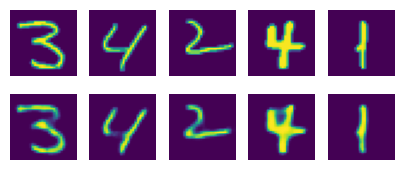

In [8]:
random_test = np.random.randint(X_test.shape[0], size=5)
ae_imgs = autoencoder.predict(X_test)

plt.figure(figsize=(7, 2))

for i, image_idx in enumerate(random_test):
    ax = plt.subplot(2, 7, i+1)
    plt.imshow(X_test[image_idx].reshape(28, 28))
    ax.axis('off')
    ax = plt.subplot(2, 7, 7 + i + 1)
    plt.imshow(ae_imgs[image_idx].reshape(28, 28))
    ax.axis('off')
    
plt.show()